# Sentiment Analysis

This notebook goes through a basic exploratory data analysis of the Cardiovascular dataset and the Machine Learning Algorithms with Python and in this project i will be working with the [Cardiovascular Data Set from Kaggle](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset). We would be predicting the likelihood of a patient having a cardiovascular disease.

Let's begin our understanding of exploratory data analysis of the  [Cardiovascular Data Set from Kaggle](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset). with Python then implementing some Machine Learning Algorithm in Python for classification and Prediction.

### About the Data set
>The dataset provided contains information related to heart / cardiovascular disease, consisting of 14 columns. The target variable represents the class and is influenced by the other 13 columns. The objective of this study is to classify the target variable into disease and non-disease categories using various machine learning algorithms, with the aim of determining the most suitable algorithm for this specific dataset.

### Attribute Information


- Age (age in years)
- Sex (1 = male; 0 = female)


In [3]:
###################### Basic Imports ######################

import time, datetime # to track our Time Complexity
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for Visualizing our data
sns.set_style('whitegrid') # change seaborn style to white grid


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# MACHINE LEARNING ALGORITHMS


# For Metrics Performance and Result Check
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# for dumping our model
import pickle

#Import Dependencies
%matplotlib inline

## 1. Get the data and read it in
"Read the Heart Disease Dataset in csv form into a dataframe called data"

The Data set s stored in a folder called `./data/CVD.csv`

In [4]:
print(os.listdir('../data')) # Android Malware data set fie path

['a1_IMDB_Dataset.csv']


In [6]:
data = pd.read_csv("../data//a1_IMDB_Dataset.csv")

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.describe()

## 2. Data Cleaning

**We going to start the data cleaning process from the target variable "sentiment"**

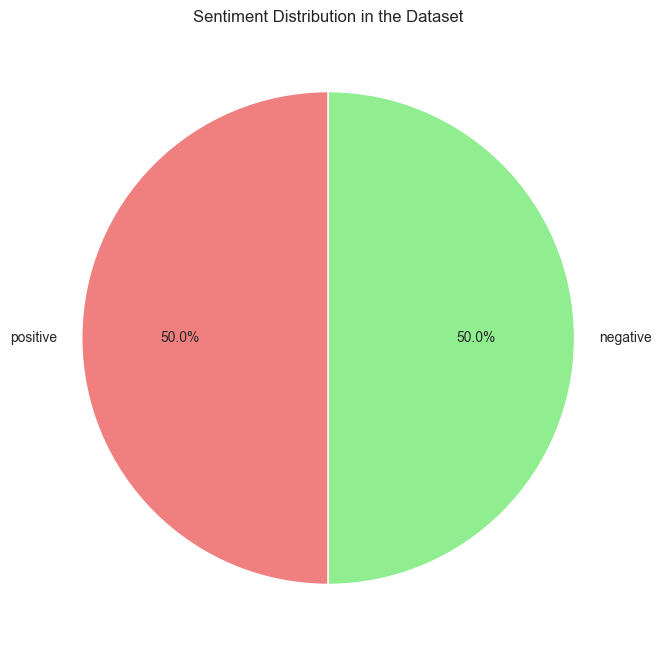

In [19]:

sentiment_distribution = data['sentiment'].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution in the Dataset')
plt.show()


In [8]:
data["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [9]:
dataBin = data.copy()

In [10]:
dataBin["sentiment"] = dataBin["sentiment"].map({"positive":1, "negative":0})

In [13]:
dataBin.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
dataBin.isnull().sum()

review       0
sentiment    0
dtype: int64

In [16]:
print("Total missing values : ",sum(list(dataBin.isna().sum())))

Total missing values :  0


<Axes: >

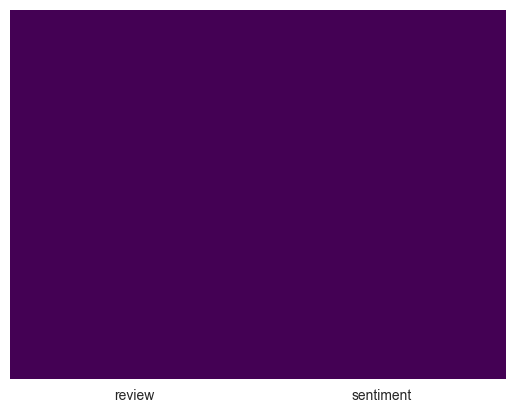

In [18]:
sns.heatmap(dataBin.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## 3. Data Preprocessing

**We going to start the data cleaning process from the target variable "sentiment"**

In [21]:
dataBin["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [23]:
import re
from bs4 import BeautifulSoup

In [26]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to remove HTML tags and symbols
dataBin['cleaned_review'] = dataBin['review'].apply(lambda x: remove_html_tags(x))
dataBin['cleaned_review'] = dataBin['cleaned_review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# Display the cleaned reviews
print(data['cleaned_review'])

C:\Users\DAVEWORLD\AppData\Local\Temp\ipykernel_13224\1572665159.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: cleaned_review, Length: 50000, dtype: object


In [25]:
dataBin.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


now let's continue with the text preprocessing steps, such as converting text to lowercase, removing stopwords, and stemming/lemmatization.

In [27]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

# Function to remove HTML tags from a string
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)
    # Remove non-alphabetic characters and symbols
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Additional preprocessing steps (e.g., remove stopwords, stemming)
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

# Apply preprocessing to the 'review' column
dataBin['cleaned_review'] = dataBin['review'].apply(preprocess_text)

# Display the cleaned reviews
print(dataBin['cleaned_review'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAVEWORLD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\DAVEWORLD\AppData\Local\Temp\ipykernel_13224\1929929526.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0        one review mention watch oz episod hook right ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: cleaned_review, Length: 50000, dtype: object


In [28]:
dataBin.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [36]:
dataBin

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movi right good job creativ origin fir...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,0,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,0,go disagre previou comment side maltin one sec...


In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with the 'cleaned_review' column
X = dataBin['cleaned_review']
y = dataBin['sentiment']  # Assuming you have a 'sentiment' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
max_words = 10000  # Choose an appropriate vocabulary size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100  # Choose an appropriate sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)


In [40]:
print(X_train_padded)

[[ 649  285    4 ...  123   52 3211]
 [  52  173   11 ...   35 1535   10]
 [   0    0    0 ...  127  192   12]
 ...
 [   0    0    0 ... 1019  251  518]
 [   0    0    0 ...   10 5357  699]
 [   0    0    0 ...  354   20 1776]]


In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Build a simple CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_numeric, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_numeric))


Epoch 1/5
625/625 [==============================] - 17s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
625/625 [==============================] - 11s 17ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
625/625 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
625/625 [==============================] - 11s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [32]:
# Evaluate the model on the test set
evaluation_result = model.evaluate(X_test_padded, y_test_numeric)
print(f"Test Accuracy: {evaluation_result[1]*100:.2f}%")

# Make predictions on new data
new_reviews = ["This movie was fantastic!", "I did not enjoy this at all."]
new_reviews_sequences = tokenizer.texts_to_sequences(new_reviews)
new_reviews_padded = pad_sequences(new_reviews_sequences, maxlen=max_len)

predictions = model.predict(new_reviews_padded)
predicted_sentiments = ['positive' if pred >= 0.5 else 'negative' for pred in predictions]

for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


313/313 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0000e+00
Test Accuracy: 0.00%
1/1 [==============================] - 0s 234ms/step
Review: This movie was fantastic!
Predicted Sentiment: negative

Review: I did not enjoy this at all.
Predicted Sentiment: negative



In [33]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Assuming 'y_train' and 'y_test' are your sentiment labels
# Convert labels to numerical format (0 for negative, 1 for positive)
y_train_numeric = y_train.map({'negative': 0, 'positive': 1})
y_test_numeric = y_test.map({'negative': 0, 'positive': 1})

# Build Simple Neural Net model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_numeric, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test_numeric))


Epoch 1/5
1250/1250 [==============================] - 17s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
1250/1250 [==============================] - 22s 18ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
1250/1250 [==============================] - 15s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
1250/1250 [==============================] - 14s 11ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
1250/1250 [==============================] - 14s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [34]:
# Evaluate the model on the test set
evaluation_result = model.evaluate(X_test_padded, y_test_numeric)
print(f"Test Accuracy: {evaluation_result[1]*100:.2f}%")


313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00
Test Accuracy: 0.00%


In [35]:
# Make predictions on new data
new_reviews = ["This movie was fantastic!", "I did not enjoy this at all."]
new_reviews_sequences = tokenizer.texts_to_sequences(new_reviews)
new_reviews_padded = pad_sequences(new_reviews_sequences, maxlen=max_len)

predictions = model.predict(new_reviews_padded)
predicted_sentiments = ['positive' if pred >= 0.5 else 'negative' for pred in predictions]

for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


1/1 [==============================] - 0s 133ms/step
Review: This movie was fantastic!
Predicted Sentiment: negative

Review: I did not enjoy this at all.
Predicted Sentiment: negative



In [14]:
import re
import nltk # Natural Language processing tool-kit
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 50000):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAVEWORLD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


KeyboardInterrupt: 

In [15]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

# Assuming 'data' is your DataFrame with the 'review' column
batch_size = 1000
num_batches = int(np.ceil(len(data['review']) / batch_size))

corpus = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_reviews = data['review'][start_idx:end_idx]

    # Text Cleaning and Preprocessing
    processed_reviews = batch_reviews.apply(lambda review: ' '.join(
        [PorterStemmer().stem(word) for word in re.sub('[^a-zA-Z]', ' ', review).lower().split() if word not in set(stopwords.words('english'))]
    ))

    corpus.extend(processed_reviews)

# 'corpus' now contains the preprocessed reviews


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAVEWORLD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataBin.iloc[:, 1].values